In [6]:
import pdb
import numpy as np
import random
import math
import argparse
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from shutil import copyfile
import scipy
from sklearn.model_selection import train_test_split

#### Visualization

In [7]:
def plotLoss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plotSinData(a, b, c, d):
    
    x = np.arange(Minimum, Maximum ,0.1)   # start,stop,step
    y = a* np.sin(b*x + c) +d
    plt.plot(x,y, 'y.--', alpha = 0.5)
    
def plotData(X_data, Y_data, data_period, params=None, model=None, title_name=None):
    
    plt.figure(figsize=(20,10))
    
    X_data = np.squeeze(X_data.copy())
    Y_data = np.squeeze(Y_data.copy())
    idx = np.argsort(X_data)
    X_data = X_data[idx]
    Y_data = Y_data[idx]
    
    plotSinData(params['a'], params['b'], params['c'], params['d'])
        
    plt.scatter(X_data, Y_data, color='violet', label="target")
        
    if model is not None:
        plt.scatter(X_data, model.predict(X_data%data_period), color='blue', label="output")
    plt.legend()
    if title_name is not None:
        plt.title(title_name)
    plt.show()

#### Make Data

In [8]:
# Train Y value
def get_Sin_Data(count, a, b, c=0, d=0, y_clip=None):
    
    #X_data = 2 * np.pi / b * cycle / count * np.arange(base, count)
    X_data = np.sort(np.random.uniform(Minimum, Maximum, size=(count,1)))
    Y_data = a * np.sin(b*X_data + c) + d
    
    if y_clip != None:
        idx = np.where(y_clip[0] <= y and y<=y_clip[1])
        X_data = X_data[idx]
        Y_data = Y_data[idx]
        
    return X_data, Y_data

#### Model

In [9]:
EPOCHS = 1000

In [10]:
def buildFCModel(input_shape,
                 hidden_layers=4,
                 hidden_neurons=128,
                 lr=0.0002):
    
    model = tf.keras.Sequential()
    model.add(Dense(hidden_neurons, input_shape=input_shape,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(LeakyReLU(alpha=0.03))
    
    for _ in range(hidden_layers):

        model.add(Dense(hidden_neurons, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        model.add(LeakyReLU(alpha=0.03))
    
    model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01)))

    model.compile(loss='mse', optimizer=Adam(lr=lr, decay=lr/(EPOCHS*EPOCHS)))
    model.summary()
    
    board = TensorBoard(log_dir='model', histogram_freq=1, write_graph=True, write_images=False)
    board.set_model(model)
    
    return model, board

In [11]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [12]:
def Get_Result_From_FC(X_data, Y_data, data_period, params, batch_size=50, epochs=1000, mode="Train"):
    model = None
    
    if mode == "Train":
        X_train,X_test,Y_train,Y_test=train_test_split(X_data, Y_data, test_size=0.2)
        model, board = buildFCModel(input_shape=(1,))
        
        plotData(X_train, Y_train, data_period, params=params, model=model, title_name="Before Training")
        
        history=model.fit(X_train%data_period, Y_train, batch_size=50, epochs=epochs, validation_data=(X_test%data_period,Y_test), callbacks=[es, mc])
        #callbacks=[board]
    
        plotLoss(history)
        
        plotData(X_train, Y_train, data_period, params=params, model=model, title_name="After Training")
        
    return model

## y = sinx 실험

#### Train Model:
[-50, 50) 범위에서 1000개 데이터를 가지고 실험.

hidden_layers=4, hidden_neurons=128

In [ ]:
params={}
params['a'] = 1 ; params['b'] = 1 ; params['c'] = 0 ; params['d'] = 0

Minimum = 0; Maximum = 2*math.pi

X_data, Y_data = get_Sin_Data(count=1000, a=params['a'], b=params['b'], c=params['c'], d=params['d'],)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

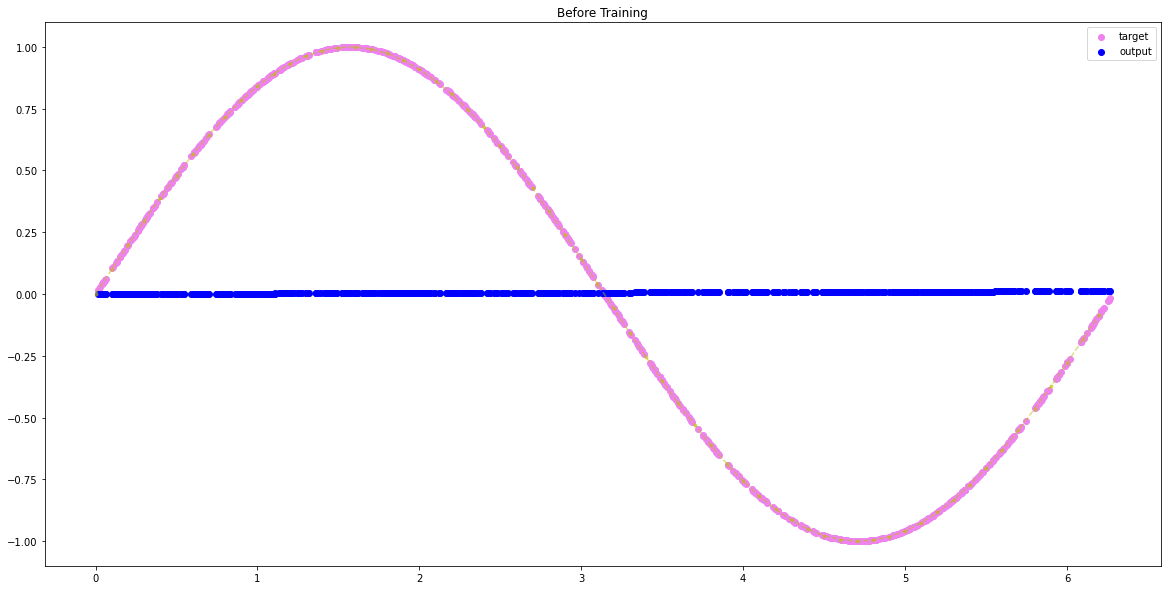

Epoch 1/1000
16/16 [==============================] - 0s 15ms/step - loss: 5.4797 - val_loss: 5.3304
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 5.1672 - val_loss: 5.0286
Epoch 3/1000
16/16 [==============================] - 0s 6ms/step - loss: 4.8748 - val_loss: 4.7390
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 4.5900 - val_loss: 4.4569
Epoch 5/1000
16/16 [==============================] - 0s 5ms/step - loss: 4.3117 - val_loss: 4.1793
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 4.0413 - val_loss: 3.9078
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 3.7823 - val_loss: 3.6549
Epoch 8/1000
16/16 [==============================] - 0s 5ms/step - loss: 3.5466 - val_loss: 3.4312
Epoch 9/1000
16/16 [==============================] - 0s 5ms/step - loss: 3.3388 - val_loss: 3.2387
Epoch 10/1000
16/16 [==============================] - 0s 6ms/step - loss: 3.1550 - val_loss: 3.059

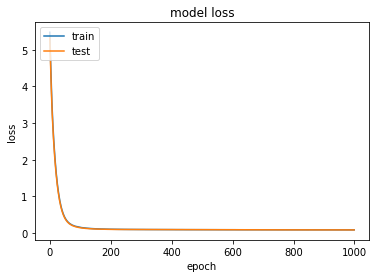

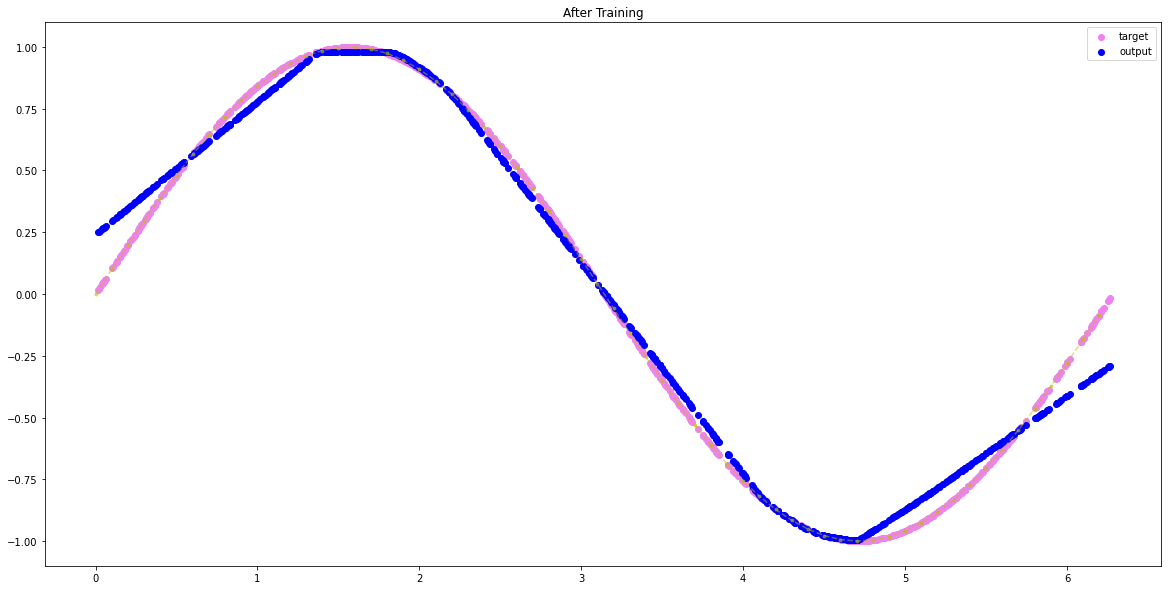

In [ ]:
FC_model = Get_Result_From_FC(X_data, Y_data, data_period=2*math.pi, params=params, mode="Train")

#### Test Model: [-500, 500) 범위에서 100개 데이터를 뽑아서 테스트

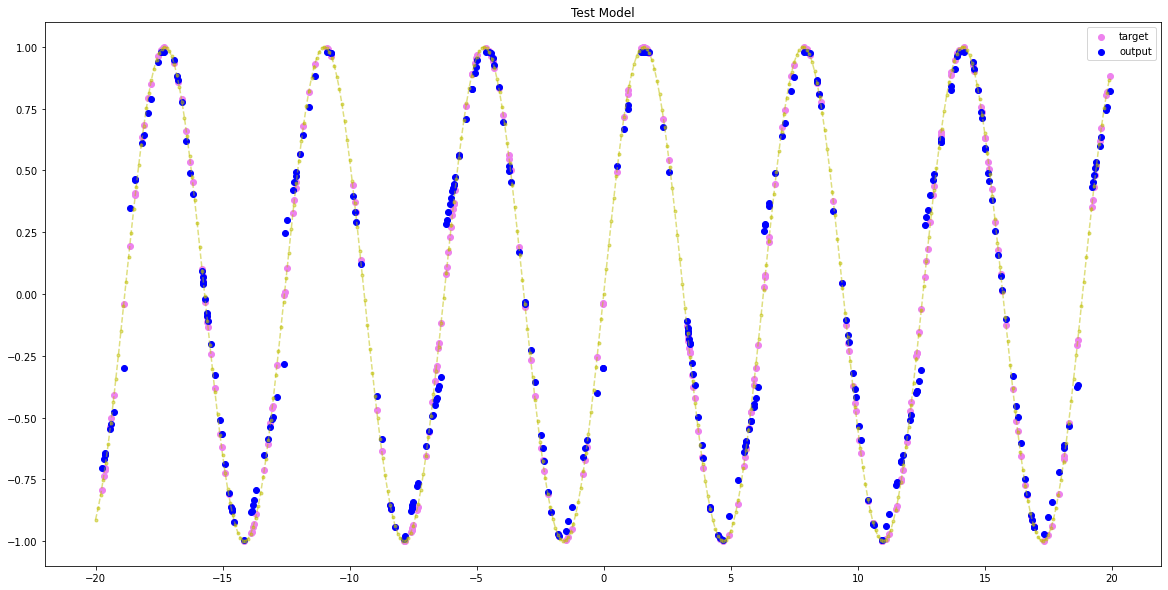

In [ ]:
params={}
params['a'] = 1 ; params['b'] = 1 ; params['c'] = 0 ; params['d'] = 0

Minimum = -20; Maximum = 20

X_Testdata, Y_Testdata = get_Sin_Data(count=300, a=params['a'], b=params['b'], c=params['c'], d=params['d'])
plotData(X_Testdata, Y_Testdata, data_period = math.pi * 2 ,params=params, model=FC_model, title_name="Test Model")

## Architecture Search

랜덤하게 a, b, c, d를 골라서 y = asin(bx + c) +d 데이터를 만들고,
이를 여러 구조에 대해서 실험해보기

In [13]:
hidden_layers = [2, 4, 8, 16]
hidden_neurons = [32, 64, 128, 256]

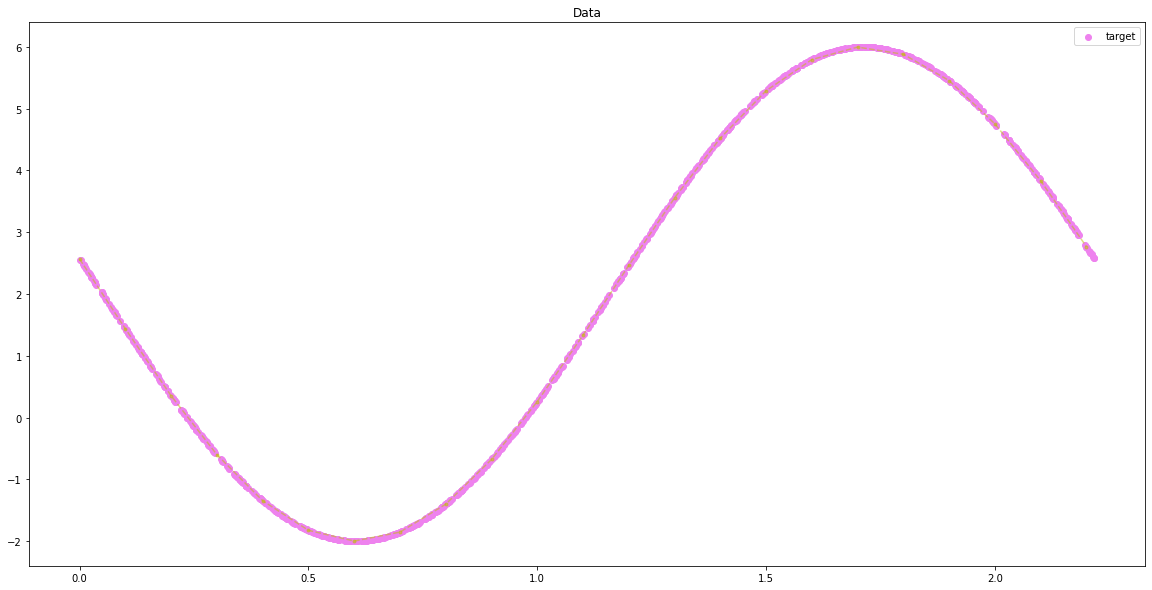

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

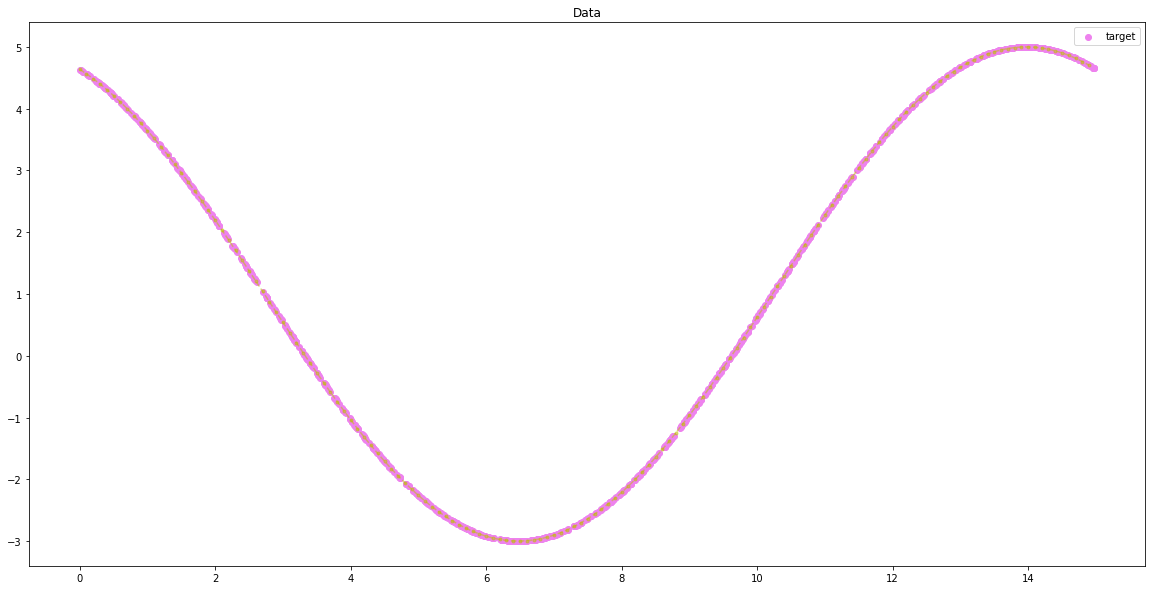

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 32)                64        
_________________________________________________________________
leaky_re_lu_136 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_153 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_137 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_154 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_138 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_155 (Dense)            (None, 1)               

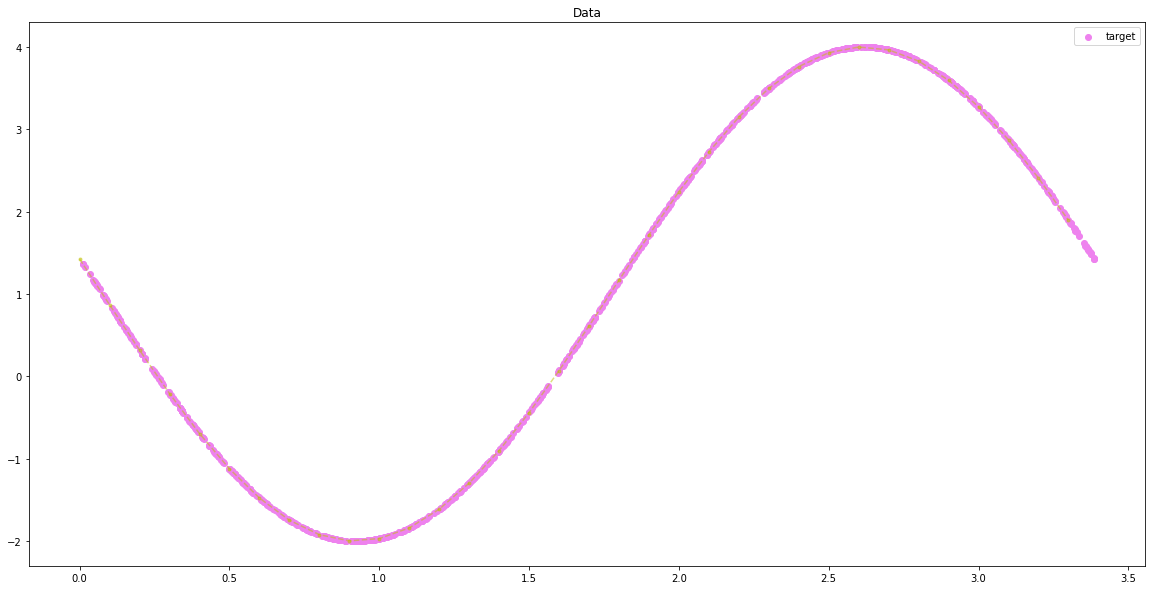

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 32)                64        
_________________________________________________________________
leaky_re_lu_272 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_305 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_273 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_306 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_274 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_307 (Dense)            (None, 1)               

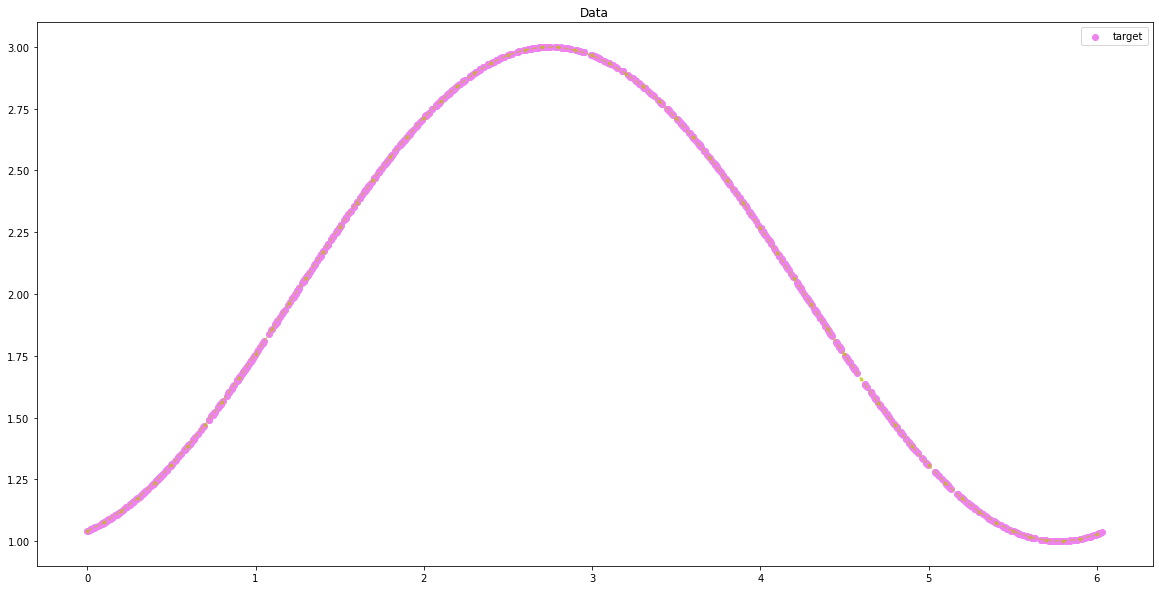

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_456 (Dense)            (None, 32)                64        
_________________________________________________________________
leaky_re_lu_408 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_457 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_409 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_458 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_410 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_459 (Dense)            (None, 1)               

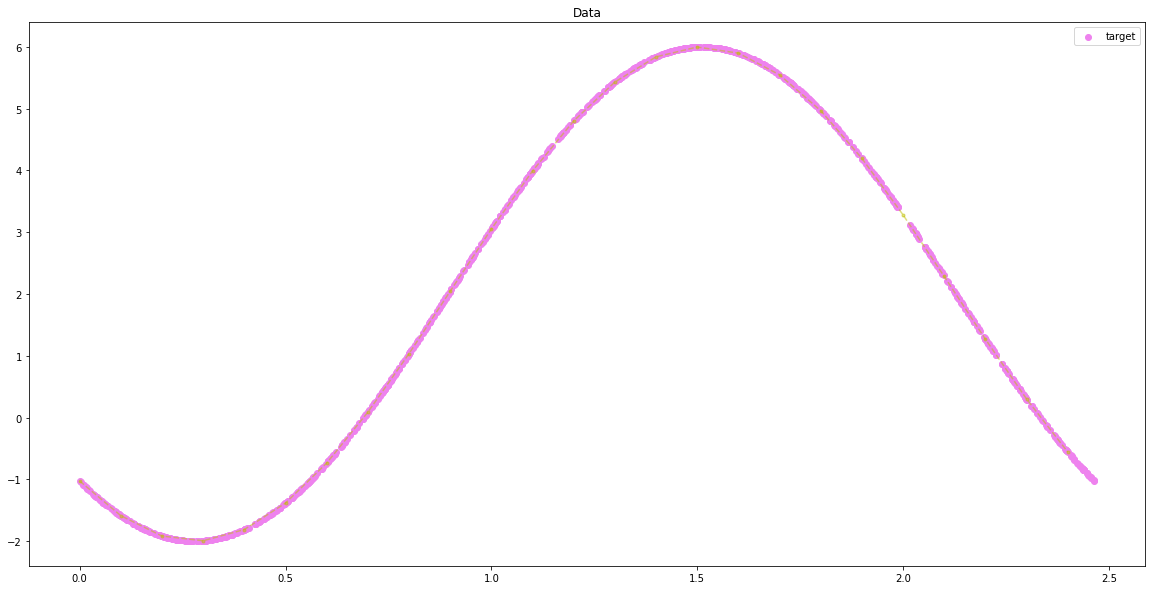

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_608 (Dense)            (None, 32)                64        
_________________________________________________________________
leaky_re_lu_544 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_609 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_545 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_610 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_546 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_611 (Dense)            (None, 1)               

In [14]:
import csv
from time import time

with open('MLP_Architecture_Search.csv','w', newline='') as f:
    wr = csv.writer(f)
    wr.writerow(['experiment number', 'a', 'b', 'c', 'd', '# hidden layers', '# hidden neurons', 'loss', '# parameters', 'time'])
    
    for i in range(5):
        params = {}
        a = random.randint(1,6) ; b = random.uniform(0.12, 3)
        c = random.randint(1,6) ; d = random.randint(1,6)
        params['a'] = a ; params['b'] = b ; params['c'] = c ; params['d'] = d
        period = math.pi * 2 / params['b']

        Maximum= period; Minimum = 0

        X_data, Y_data = get_Sin_Data(count=1000, a=params['a'], b=params['b'], c=params['c'], d=params['d'])
        plotData(X_data, Y_data, period, params=params, model=None, title_name="Data")

        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

        for l in hidden_layers:
            for n in hidden_neurons:
                name = "hidden_layer_" + str(l)+"_hidden_neurons_"+str(n)
                model, _ = buildFCModel(input_shape=(1,), hidden_layers=l, hidden_neurons=n)
                start = time()
                history = model.fit(X_train % period, Y_train, batch_size=50, epochs=EPOCHS, validation_data=(X_test % period,Y_test), verbose = 0, callbacks=[es, mc] )
                end = time()
                acc = history.history['val_loss'][-1]
                parameters = model.count_params()
                
                wr.writerow([i, a, b, c, d, l, n, acc, parameters, end-start])

### Visualize Result

In [15]:
import pandas as pd
result = pd.read_csv('./MLP_Architecture_Search.csv')
print(result)

    experiment number  a         b  ...      loss  # parameters       time
0                   0  4  2.832747  ...  0.270801          2209  62.375774
1                   0  4  2.832747  ...  0.265772          8513  47.116940
2                   0  4  2.832747  ...  0.246698         33409  49.403662
3                   0  4  2.832747  ...  0.243917        132353  48.901005
4                   0  4  2.832747  ...  0.224335          4321  55.041334
..                ... ..       ...  ...       ...           ...        ...
75                  4  4  2.549389  ...  0.205997        527105  61.702818
76                  4  4  2.549389  ...  0.300666         16993  77.066880
77                  4  4  2.549389  ...  0.320894         66753  75.526348
78                  4  4  2.549389  ...  0.308044        264577  77.681487
79                  4  4  2.549389  ...  0.283431       1053441  78.040067

[80 rows x 10 columns]


In [16]:
result_time = result['time'].groupby([result['# hidden layers'], result['# hidden neurons']]).mean()
result_time = result_time.unstack()
print(result_time)

# hidden neurons        32         64         128        256
# hidden layers                                             
2                 51.554368  46.923314  46.757463  46.761836
4                 51.833273  51.599551  52.597137  50.662858
8                 61.101674  60.737186  62.133213  62.858387
16                78.695365  79.723591  80.774768  79.675704


In [17]:
result_time

# hidden neurons,32,64,128,256
# hidden layers,,,,
2,51.554368,46.923314,46.757463,46.761836
4,51.833273,51.599551,52.597137,50.662858
8,61.101674,60.737186,62.133213,62.858387
16,78.695365,79.723591,80.774768,79.675704


In [18]:
plt.rcParams.update({'font.size': 13})

In [19]:
hidden_neurons = [32, 64, 128, 256]
hidden_layers = [2, 4, 8, 16]

In [32]:
i = 0 ; j = 3
print(result_time.loc[16][256])

79.67570428848266


In [ ]:
# i = 0 : row보기 1: col 보기

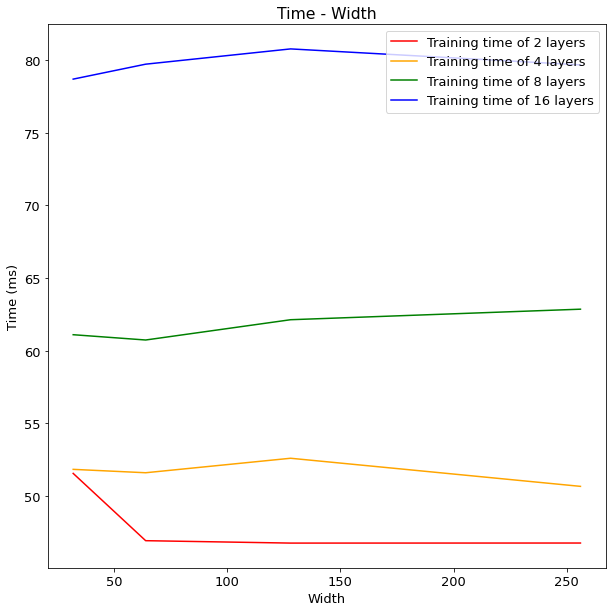

In [35]:
plt.figure(figsize=(10, 10))

color = ['red', 'orange', 'green', 'blue']

# row 보기: depth에서, width 따른 시간 변화
for idx, l in enumerate(hidden_layers):
    name = str(l)+'_layers'
    time_data = []
    
    for n in hidden_neurons:
        time_data.append(result_time.loc[l][n])
    
    plt.plot(hidden_neurons, time_data, color=color[idx], label="Training time of " + str(l) + " layers")
    plt.xlabel("Width")
    plt.ylabel("Time (ms)")
    
plt.legend()
plt.title("Time - Width" )
    
plt.show()
plt.close()

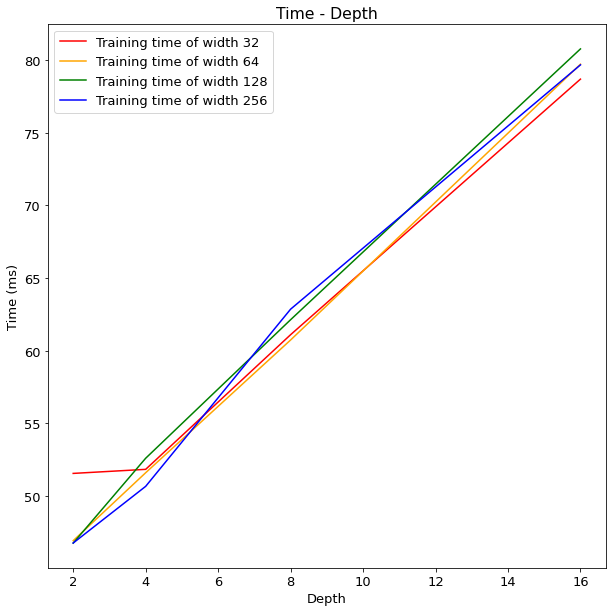

In [40]:
plt.figure(figsize=(10, 10))

color = ['red', 'orange', 'green', 'blue']

# row 보기: depth에서, width 따른 시간 변화
for idx, n in enumerate(hidden_neurons):
    name = str(l)+'_layers'
    time_data = []
    
    for l in hidden_layers:
        time_data.append(result_time.loc[l][n])
    
    plt.plot(hidden_layers, time_data, color=color[idx], label="Training time of width " + str(n))
    plt.xlabel("Depth")
    plt.ylabel("Time (ms)")
    
plt.legend()
plt.title("Time - Depth" )
    
plt.show()
plt.close()

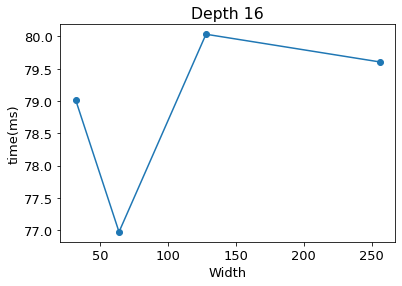

In [ ]:
plt.plot(result_time.iloc(i)[j], '-o')
plt.ylabel('time(ms)')
plt.xlabel('Width')
plt.title("Depth " + str(hidden_layers[j]))
plt.show()

In [42]:
loss_result = result['loss'].groupby([result['# hidden layers'], result['# hidden neurons']]).mean()
loss_result = loss_result.unstack()
print(loss_result)

# hidden neurons       32        64        128       256
# hidden layers                                         
2                 0.184641  0.172519  0.168214  0.159763
4                 0.173730  0.167241  0.157746  0.153991
8                 0.208276  0.200005  0.184705  0.183898
16                0.297508  0.308571  0.407575  0.396394


In [43]:
parameters_result = result['# parameters'].groupby([result['# hidden layers'], result['# hidden neurons']]).mean()
parameters_result = parameters_result.unstack()
print(parameters_result)

# hidden neurons    32     64      128      256
# hidden layers                                
2                  2209   8513   33409   132353
4                  4321  16833   66433   263937
8                  8545  33473  132481   527105
16                16993  66753  264577  1053441


In [44]:
loss_result.to_csv('loss_result1.csv', encoding='utf-8', index=True)
loss_result = pd.read_csv('loss_result1.csv')

parameters_result.to_csv('parameters_result1.csv', encoding='utf-8', index=True)
parameters_result = pd.read_csv('parameters_result1.csv')

In [45]:
print(loss_result)
print(parameters_result)

   # hidden layers        32        64       128       256
0                2  0.184641  0.172519  0.168214  0.159763
1                4  0.173730  0.167241  0.157746  0.153991
2                8  0.208276  0.200005  0.184705  0.183898
3               16  0.297508  0.308571  0.407575  0.396394
   # hidden layers     32     64     128      256
0                2   2209   8513   33409   132353
1                4   4321  16833   66433   263937
2                8   8545  33473  132481   527105
3               16  16993  66753  264577  1053441


In [46]:
print(parameters_result.loc[0][2])

8513


#### hidden neuron 증가에 따른 변화

In [47]:
plt.rcParams.update({'font.size': 18})

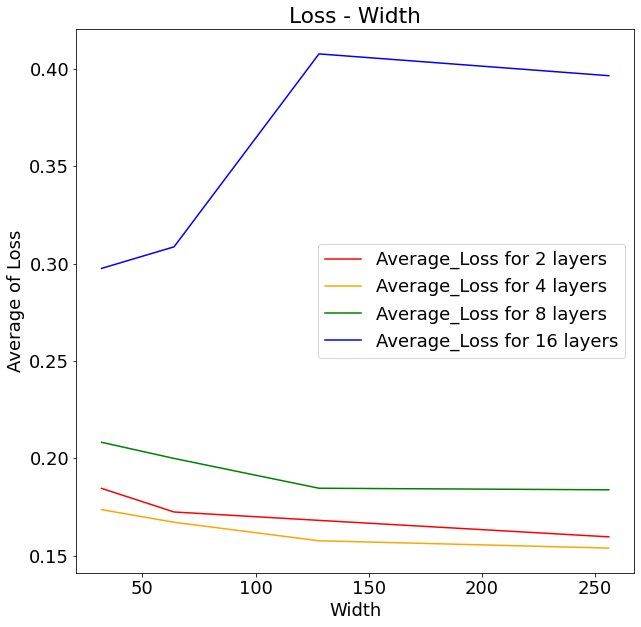

In [48]:
plt.figure(figsize=(10, 10))

loss = {}
color = ['red', 'orange', 'green', 'blue']

for l in range(len(hidden_layers)):
    name = str(hidden_layers[l])+'_layers'
    loss_data = []
    
    for n in range(len(hidden_neurons)):
        loss_data.append(loss_result.loc[l][n+1])
        
    loss[name] = loss_data
    
    plt.plot(hidden_neurons, loss_data, color=color[l], label="Average_Loss for " + str(hidden_layers[l]) + " layers")
    plt.xlabel("Width")
    plt.ylabel("Average of Loss")
    
plt.legend()
plt.title("Loss - Width" )
    
plt.show()
plt.close()

### layer 증가에 따른 변화

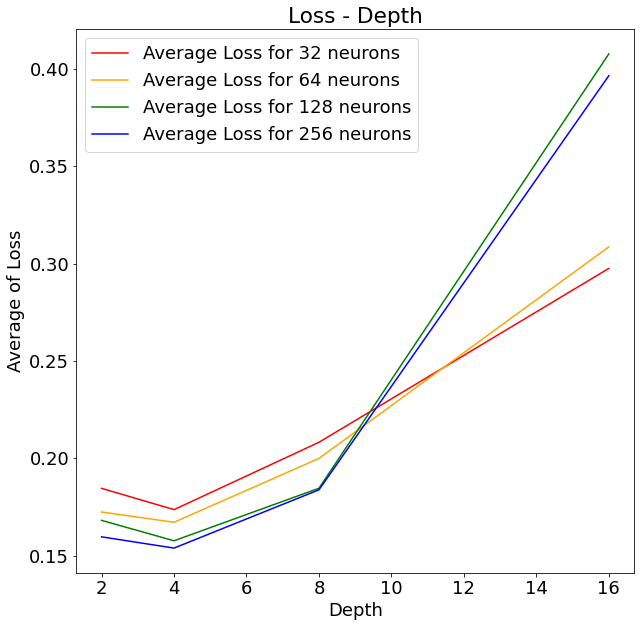

In [53]:
total_loss_params = {}

plt.figure(figsize=(10, 10))

loss = {}
color = ['red', 'orange', 'green', 'blue']

for n in range(len(hidden_neurons)):
    loss_data = []
    
    for l in range(len(hidden_layers)):
        name = '( ' + str(hidden_layers[l]) + ', ' + str(hidden_neurons[n]) + ' )'
        loss_data.append(loss_result.loc[l][n+1])
        total_loss_params[name] = (loss_result.loc[l][n+1], parameters_result.loc[l][n+1])
        
    loss[name] = loss_data
    
    plt.plot(hidden_layers, loss_data, color=color[n], label="Average Loss for " + str(hidden_neurons[n]) + " neurons")
    plt.xlabel("Depth")
    plt.ylabel("Average of Loss")
    
plt.legend()
plt.title("Loss - Depth" )
    
plt.show()
plt.close()

In [50]:
print(total_loss_params)

{'( 2, 32 )': (0.18464120626449584, 2209), '( 4, 32 )': (0.17373022437095642, 4321), '( 8, 32 )': (0.2082761123776436, 8545), '( 16, 32 )': (0.2975077897310257, 16993), '( 2, 64 )': (0.17251932471990586, 8513), '( 4, 64 )': (0.1672408699989319, 16833), '( 8, 64 )': (0.20000473856925965, 33473), '( 16, 64 )': (0.3085709661245346, 66753), '( 2, 128 )': (0.16821389645338058, 33409), '( 4, 128 )': (0.15774592459201814, 66433), '( 8, 128 )': (0.1847051337361336, 132481), '( 16, 128 )': (0.4075746715068817, 264577), '( 2, 256 )': (0.159762591868639, 132353), '( 4, 256 )': (0.1539911761879921, 263937), '( 8, 256 )': (0.1838977888226509, 527105), '( 16, 256 )': (0.3963938355445862, 1053441)}


In [51]:
print(total_loss_params['( 2, 32 )'][1])

2209


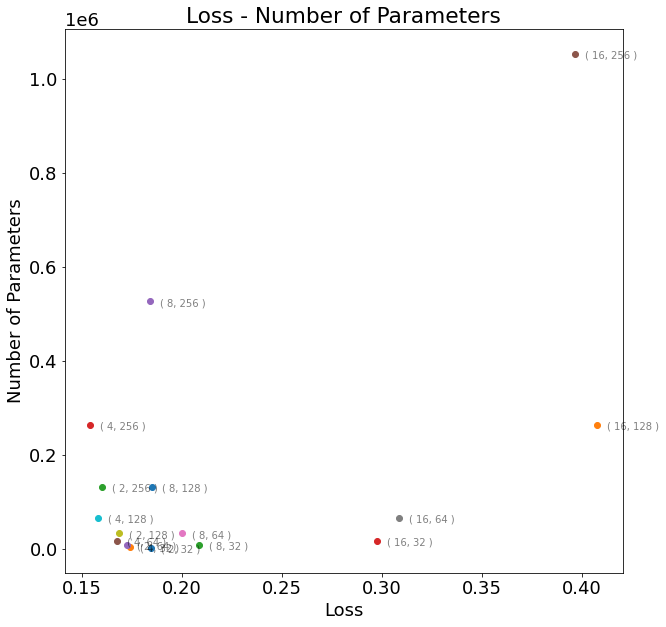

In [56]:
plt.figure(figsize=(10, 10))
for key in total_loss_params.keys():
    plt.scatter(total_loss_params[key][0],total_loss_params[key][1], label=key)
    plt.text(total_loss_params[key][0]+0.005, (total_loss_params[key][1]-10000), s=key, fontsize=10, alpha=0.5)
plt.ylabel("Number of Parameters")
plt.xlabel("Loss")
plt.title("Loss - Number of Parameters")
plt.show()
plt.close()